In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import subprocess
import os

In [2]:
def draw(latex):
    from PIL import Image

    tmpfilename = "circuit"
    latex_filename =  f"{tmpfilename}.tex"
    pdf_filename = f"{tmpfilename}.pdf"
    with open(latex_filename, "w") as latex_file:
        latex_file.write(latex)
    try:
        cmd = f"pdflatex {latex_filename}"
#        print(f"Running cmd {cmd}")
        res = subprocess.run(cmd, capture_output=True)
#        print(str(res.stdout))
    except OSError as exc:
        print("`pdflatex` command could not be run.")
        return None
    except subprocess.CalledProcessError as exc:
        print(
            "Unable to compile LaTeX. Perhaps you are missing the `qcircuit` package."
            " The output from the `pdflatex` command is in `latex_error.log`."
        )
        print(exc.stdout)
        return None
    try:
        subprocess.run(
            ["pdftocairo", "-singlefile", "-png", "-q", pdf_filename, tmpfilename],
            check=True,
        )
    except (OSError, subprocess.CalledProcessError) as exc:
        print("`pdftocairo` failed to produce an image.")
        print(res.stdout.decode("utf-8"))
        return None
    os.remove(pdf_filename)
    image = Image.open(tmpfilename + ".png")
#        image = utils._trim(image)
    return image

# Bell pair generation

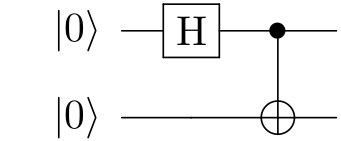

In [3]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2.0}{
    \Qcircuit @C=1em @R=1em {
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} & \ctrl{1} & \rstick{\ket{0}} \qw \\
    \nghost{1} & \lstick{\ket{0}} & \qw               &\targ & \rstick{\ket{1}} \qw
}
}


\end{document}"""

draw(latex)

# Deutsch-Jozse

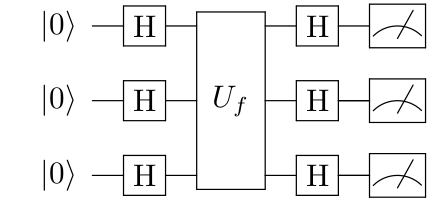

In [4]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{1.5}{
    \Qcircuit @C=1em @R=1em {
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} &  \multigate{2}{U_f} & \gate{\mathrm{H}} & \meter \\
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} &  \ghost{U_f}        & \gate{\mathrm{H}} & \meter \qw \\
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} &  \ghost{U_f}        & \gate{\mathrm{H}} & \meter \qw
}
}


\end{document}"""

draw(latex)

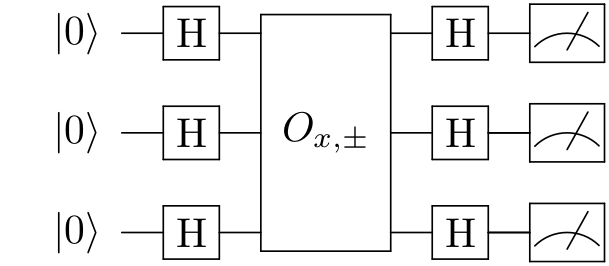

In [22]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2}{
    \Qcircuit @C=1em @R=1em {
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} &  \multigate{2}{O_{x, \pm}} & \gate{\mathrm{H}} & \meter \\
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} &  \ghost{O_{x, \pm}}        & \gate{\mathrm{H}} & \meter \qw \\
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} &  \ghost{O_{x, \pm}}        & \gate{\mathrm{H}} & \meter \qw
}
}


\end{document}"""

draw(latex)

# Grover

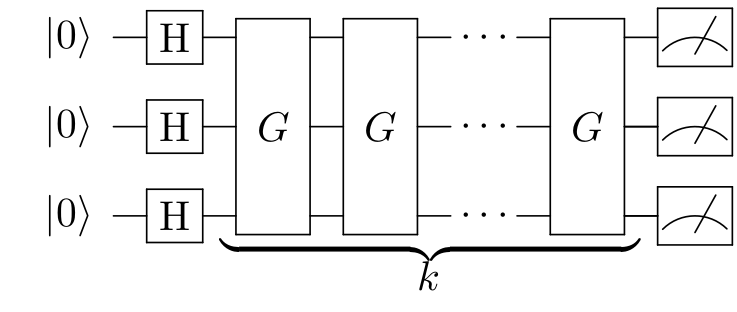

In [127]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2}{
    \Qcircuit @C=0.8em @R=0.75em {
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} &  \multigate{2}{G} & \multigate{2}{G} & \qw & \cdots  & & \multigate{2}{G}  & \meter \\
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} &  \ghost{G}        & \ghost{G}        & \qw & \cdots  & & \ghost{G}         & \meter \qw \\
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} &  \ghost{G}        & \ghost{G}        & \qw & \cdots  & & \ghost{G}         & \meter \qw \gategroup{1}{4}{3}{9}{.7em}{_\}} \\
    & & & & \ \ \ \ \ \ \ k& & & & \\
    & & & & & & & & \\
}
}


\end{document}"""
draw(latex)

# Fourier

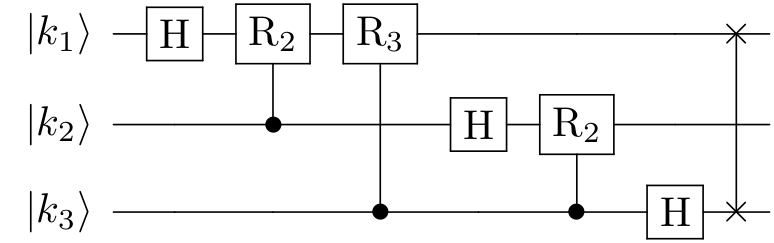

In [144]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2}{
    \Qcircuit @C=0.8em @R=0.75em {
    \nghost{1} & \lstick{\ket{k_1}} & \gate{\mathrm{H}} & \gate{\mathrm{R_2}} & \gate{\mathrm{R_3}} & \qw               & \qw                 & \qw               & \qswap          & \qw \\
    \nghost{1} & \lstick{\ket{k_2}} & \qw               & \ctrl{-1}           & \qw                 & \gate{\mathrm{H}} & \gate{\mathrm{R_2}} & \qw               & \qw             & \qw \\
    \nghost{1} & \lstick{\ket{k_3}} & \qw               & \qw                 & \ctrl{-2}           & \qw               & \ctrl{-1}           & \gate{\mathrm{H}} & \qswap \qwx[-2] & \qw \\
}
}

\end{document}"""
draw(latex)

# Phase estimation

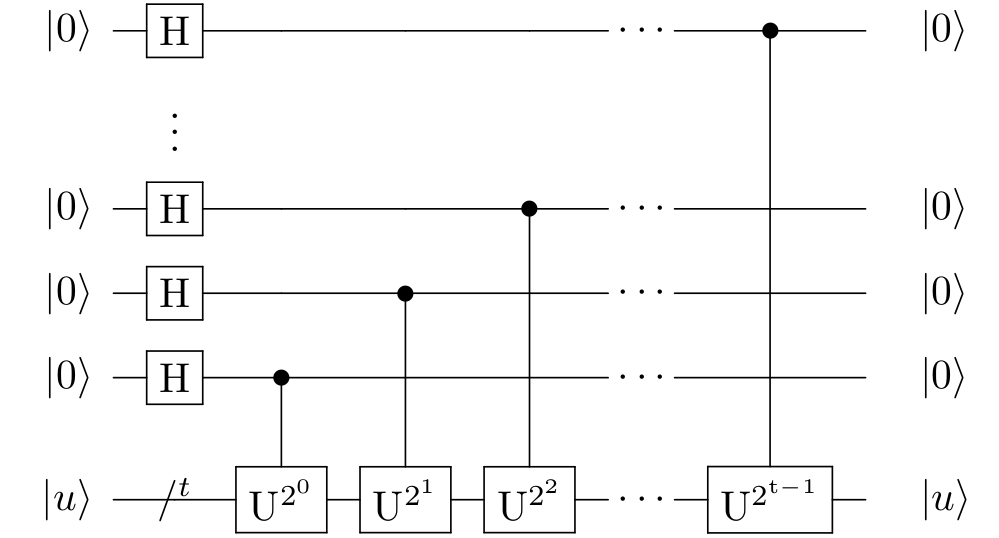

In [185]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2}{
    \Qcircuit @C=0.8em @R=0.75em {
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} & \qw                     & \qw                     & \qw                     & \qw                     & \cdots & & \ctrl{6}                     & \qw & \rstick{\ket{0}} & \nghost{1}\\
               &                  & \push{\vdots}            &                         &                         &                         &                         &        & &                              &     &                  & \\
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} & \qw                     & \qw                     & \ctrl{4}                & \qw                     & \cdots & & \qw                          & \qw & \rstick{\ket{0}} & \\
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} & \qw                     & \ctrl{3}                & \qw                     & \qw                     & \cdots & & \qw                          & \qw & \rstick{\ket{0}} & \\
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} & \ctrl{2}                & \qw                     & \qw                     & \qw                     & \cdots & & \qw                          & \qw & \rstick{\ket{0}} & \\
               &                  &                   &                         &                         &                         &                         &        & &                              &     &                  & \\
    \nghost{1} & \lstick{\ket{u}} & {/}^t \qw         & \gate{\mathrm{U^{2^0}}} & \gate{\mathrm{U^{2^1}}} & \gate{\mathrm{U^{2^2}}} & \qw                     & \cdots & & \gate{\mathrm{U^{2^{t-1}}}}  & \qw & \rstick{\ket{u}} &  \\ 
}
}

\end{document}"""
draw(latex)

# Sandbox

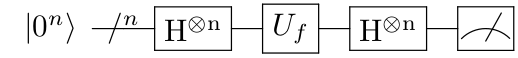

In [6]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{1.5}{
    \Qcircuit @C=1em @R=1em {
    \nghost{1} & \lstick{\ket{0^n}} & {/}^n \qw & \gate{\mathrm{H^{\otimes n}}}  &  \gate{U_f} & \gate{\mathrm{H^{\otimes n}}} & \meter \\
}
}


\end{document}"""

draw(latex)

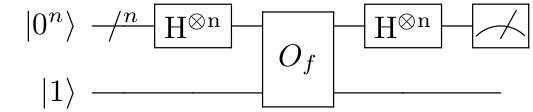

In [7]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{1.5}{
    \Qcircuit @C=1em @R=1em {
    \nghost{1} & \lstick{\ket{0^n}} & {/}^n \qw & \gate{\mathrm{H^{\otimes n}}}  &  \multigate{1}{O_f} & \gate{\mathrm{H^{\otimes n}}} & \meter \\
    \nghost{1} & \lstick{\ket{1}} &  \qw & \qw  &  \ghost{O_f} & \qw & \qw \\
}
}


\end{document}"""

draw(latex)

In [8]:
circuit = QuantumCircuit(3, 3)

circuit.x(1)
circuit.h(range(3))
circuit.cx(0, 1)
circuit.measure(range(3), range(3));
circuit.draw(output="latex_source")

'\\documentclass[border=2px]{standalone}\n        \n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document} \n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{ {q}_{0} :  } & \\lstick{ {q}_{0} :  } & \\gate{\\mathrm{H}} & \\qw & \\ctrl{1} & \\meter & \\qw & \\qw & \\qw\\\\ \n\t \t\\nghost{ {q}_{1} :  } & \\lstick{ {q}_{1} :  } & \\gate{\\mathrm{X}} & \\gate{\\mathrm{H}} & \\targ & \\qw & \\meter & \\qw & \\qw\\\\ \n\t \t\\nghost{ {q}_{2} :  } & \\lstick{ {q}_{2} :  } & \\gate{\\mathrm{H}} & \\meter & \\qw & \\qw & \\qw & \\qw & \\qw\\\\ \n\t \t\\nghost{c:} & \\lstick{c:} & \\lstick{/_{_{3}}} \\cw & \\dstick{_{_{2}}} \\cw \\cwx[-1] & \\cw & \\dstick{_{_{0}}} \\cw \\cwx[-3] & \\dstick{_{_{1}}} \\cw \\cwx[-2] & \\cw & \\cw\\\\ \n\\\\ }}\n\\end{document}'

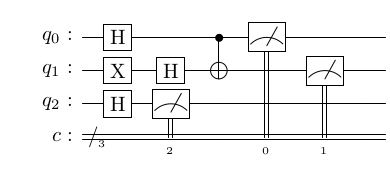

In [9]:
s = '\\documentclass[border=2px]{standalone}\n        \n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document} \n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{ {q}_{0} :  } & \\lstick{ {q}_{0} :  } & \\gate{\\mathrm{H}} & \\qw & \\ctrl{1} & \\meter & \\qw & \\qw & \\qw\\\\ \n\t \t\\nghost{ {q}_{1} :  } & \\lstick{ {q}_{1} :  } & \\gate{\\mathrm{X}} & \\gate{\\mathrm{H}} & \\targ & \\qw & \\meter & \\qw & \\qw\\\\ \n\t \t\\nghost{ {q}_{2} :  } & \\lstick{ {q}_{2} :  } & \\gate{\\mathrm{H}} & \\meter & \\qw & \\qw & \\qw & \\qw & \\qw\\\\ \n\t \t\\nghost{c:} & \\lstick{c:} & \\lstick{/_{_{3}}} \\cw & \\dstick{_{_{2}}} \\cw \\cwx[-1] & \\cw & \\dstick{_{_{0}}} \\cw \\cwx[-3] & \\dstick{_{_{1}}} \\cw \\cwx[-2] & \\cw & \\cw\\\\ \n\\\\ }}\n\\end{document}'
draw(s)

In [10]:
latex = r"""\\documentclass[border=2px]{standalone}\n        \n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document} \n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{ {q}_{0} :  } & \\lstick{ {q}_{0} :  } & \\gate{\\mathrm{H}} & \\qw & \\ctrl{1} & \\meter & \\qw & \\qw & \\qw\\\\ \n\t \t\\nghost{ {q}_{1} :  } & \\lstick{ {q}_{1} :  } & \\gate{\\mathrm{X}} & \\gate{\\mathrm{H}} & \\targ & \\qw & \\meter & \\qw & \\qw\\\\ \n\t \t\\nghost{ {q}_{2} :  } & \\lstick{ {q}_{2} :  } & \\gate{\\mathrm{H}} & \\meter & \\qw & \\qw & \\qw & \\qw & \\qw\\\\ \n\t \t\\nghost{c:} & \\lstick{c:} & \\lstick{/_{_{3}}} \\cw & \\dstick{_{_{2}}} \\cw \\cwx[-1] & \\cw & \\dstick{_{_{0}}} \\cw \\cwx[-3] & \\dstick{_{_{1}}} \\cw \\cwx[-2] & \\cw & \\cw\\\\ \n\\\\ }}\n\\end{document}"""

draw(latex)

`pdftocairo` failed to produce an image.
This is pdfTeX, Version 3.14159265-2.6-1.40.19 (MiKTeX 2.9.6840)
entering extended mode
(circuit.tex
LaTeX2e <2018-04-01> patch level 5

! LaTeX Error: There's no line here to end.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.1 \\d
       ocumentclass[border=2px]{standalone}\n        \n\\usepackage[braket, ...

? 
! Emergency stop.
 ...                                              
                                                  
l.1 \\d
       ocumentclass[border=2px]{standalone}\n        \n\\usepackage[braket, ...

!  ==> Fatal error occurred, no output PDF file produced!
Transcript written on circuit.log.



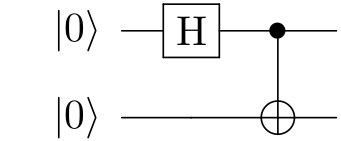

In [11]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2.0}{
    \Qcircuit @C=1em @R=1em {
    \nghost{1} & \lstick{\ket{0}} & \gate{\mathrm{H}} & \ctrl{1} & \rstick{\ket{0}} \qw \\
    \nghost{1} & \lstick{\ket{0}} & \qw               &\targ & \rstick{\ket{1}} \qw
}
}


\end{document}"""

draw(latex)

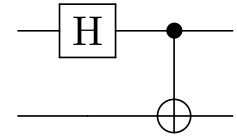

In [12]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2.0}{
    \Qcircuit @C=1em @R=1em {
    \lstick{\ket{0}} & \gate{\mathrm{H}} & \ctrl{1} & \rstick{\ket{0}} \qw \\
    \lstick{\ket{0}} & \qw               &\targ & \rstick{\ket{1}} \qw
}
}


\end{document}"""

draw(latex)

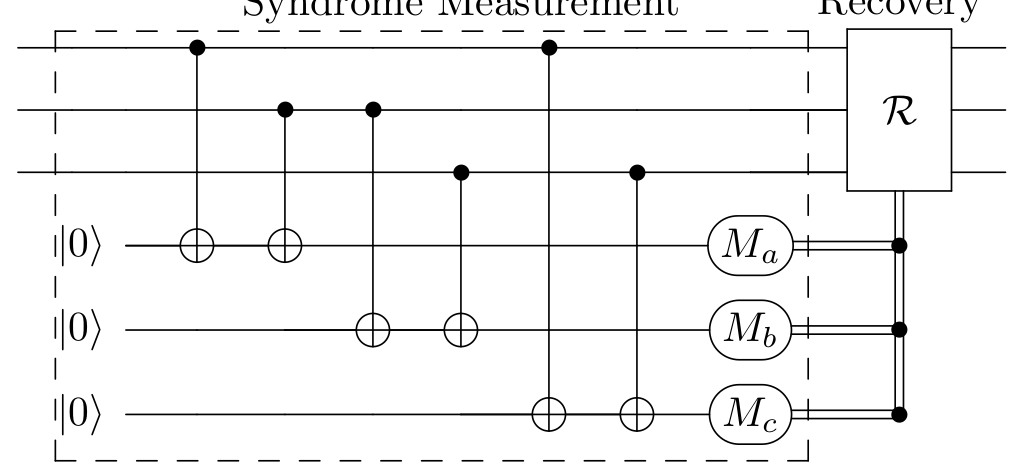

In [116]:
latex = r"""\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{2.0}{

\Qcircuit @C=1.3em @R=.6em {
& & & & & & \mbox{Syndrome Measurement} & & & &
\mbox{Recovery}\\
& \qw & \qw & \ctrl{3} & \qw & \qw & \qw &
\ctrl{5} & \qw & \qw &
\multigate{2}{\ \mathcal{R}\ } & \qw\\
& \qw & \qw & \qw & \ctrl{2} & \ctrl{3} & \qw &
\qw & \qw & \qw & \ghost{\ \mathcal{R}\ } \qw &
\qw\\
& \qw & \qw & \qw & \qw & \qw & \ctrl{2} & \qw &
\ctrl{3} & \qw & \ghost{\ \mathcal{R}\ } \qw &
\qw\\
& & \lstick{\ket{0}} & \targ \qw & \targ \qw &
\qw & \qw & \qw & \qw & \measure{M_a} &
\control \cw \cwx\\
& & \lstick{\ket{0}} & \qw & \qw & \targ \qw &
\targ \qw & \qw & \qw & \measure{M_b} &
\control \cw \cwx\\
& & \lstick{\ket{0}} & \qw & \qw & \qw & \qw &
\targ \qw & \targ \qw & \measure{M_c}
\gategroup{2}{2}{7}{10}{.8em}{--} &
\control \cw \cwx
}

}


\end{document}"""

draw(latex)

In [190]:
def print_multi(s,n):
    k = 0
    loc = 0
    while k < len(s):
        k = k + n
        while k < len(s) and s[k] != " ":
            k += 1
        print(s[loc:k])
        loc = k + 1
        
prompt = "Alan Turing, Ada Lovelace and Charles Babbage working together on a physical Turing machine. Airbrush comic book cover in the style of Norman Rockwell. Casual clothes. Curious expression. Big room, lights. Victorian steampunk. Positive mood, high energy, excitement, happy, smart, amazing. Tech, professional, creative. Medium shot, warm lighting, bright colors."
print_multi(prompt, 80)

Alan Turing, Ada Lovelace and Charles Babbage working together on a physical Turing
machine. Airbrush comic book cover in the style of Norman Rockwell. Casual clothes.
Curious expression. Big room, lights. Victorian steampunk. Positive mood, high energy,
excitement, happy, smart, amazing. Tech, professional, creative. Medium shot, warm
lighting, bright colors.
